# Import necessary libraries

In [135]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
plt.style.use('fivethirtyeight')

# Import Online Retail Dataset containing transactions

In [136]:
cust_df = pd.read_csv('OnlineRetail.csv',encoding ='unicode_escape') 
cust_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Data Analysis and Pre-processing

In [137]:
cust_df.shape

(541909, 8)

In [138]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [139]:
cust_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [140]:
company_cust_df = cust_df[['Country','CustomerID']].drop_duplicates()
company_cust_df.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID',ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [141]:
data = cust_df

<AxesSubplot:>

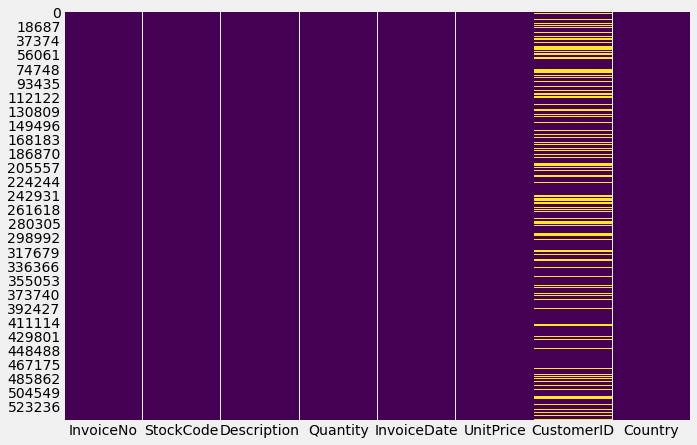

In [142]:
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(),cbar = False, cmap='viridis')

In [143]:
cust_df = cust_df.query("Country == 'United Kingdom'").reset_index(drop=True)

In [144]:
cust_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [145]:
cust_df.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [146]:
#removing missing values from customerID column
cust_df = cust_df[pd.notnull(cust_df['CustomerID'])]

#validate if any negative value in a column
cust_df.Quantity.min()

-80995

In [147]:
##validate if any negative value in a column
cust_df.UnitPrice.min()

0.0

In [148]:
#Filter out the records having negative values
cust_df = cust_df[(cust_df['Quantity']>0)]

In [149]:
#convert to standard datetime format
cust_df['InvoiceDate'] = pd.to_datetime(cust_df['InvoiceDate'])

In [150]:
#Adding a column for total amount 
cust_df['Total Amount'] = cust_df['Quantity'] * cust_df['UnitPrice']

In [151]:
#dataframe after cleaning and pre-processing
cust_df.shape

(354345, 9)

In [152]:
cust_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Data Visualization

In [153]:
#creating YearMonth field for the ease of reporting and visualization

cust_df['Invoice->YearMonth'] = cust_df['InvoiceDate'].map(lambda date: 100*date.year + date.month)

In [154]:
#Revenue for each row and a new dataframe with YearMonth - Revenue columns

#cust_df['Revenue'] = cust_df['UnitPrice'] * cust_df['Quantity']
df_revenue = cust_df.groupby(['Invoice->YearMonth'])['Total Amount'].sum().reset_index()
df_revenue

,Invoice->YearMonth,Total Amount
0,201012,498661.850
1,201101,442190.060
2,201102,355655.630
3,201103,467198.590
4,201104,409559.141
5,201105,551568.820
6,201106,524915.480
7,201107,485612.251
8,201108,498453.320
9,201109,796780.272


1. Monthly Revenue

In [155]:
#Visulaization
plot_df = [go.Scatter(x=df_revenue['Invoice->YearMonth'],y=df_revenue['Total Amount'],)]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Montly Revenue',
        xaxis_title="Invoice->YearMonth",
        yaxis_title="Total Amount",
        
)

fig = go.Figure(data=plot_df, layout=plot_layout)
pyoff.iplot(fig)

It Clearly shows that Revenue is gradually increased in october 2010 to december 2010 and somehow decreased in the month of january 2011 and then this up-down phase continued till july 2011 and then a sudden increase in revenue is observed in August 2011 and then decreased in september and then it falls down in december at a big rate.

2.Monthly Revenue Growth Rate

In [156]:
#using pct_change() function to see monthly percentage change

df_revenue['Monthly-Growth'] = df_revenue['Total Amount'].pct_change()

#showing first 5 rows

df_revenue.head(5)

,Invoice->YearMonth,Total Amount,Monthly-Growth
0,201012,498661.850,NaN
1,201101,442190.060,-0.113247
2,201102,355655.630,-0.195695
3,201103,467198.590,0.313626
4,201104,409559.141,-0.123372


3. Monthly Active Customers

In [157]:
#creating monthly active customers dataframe by counting unique Customer IDs

df_monthly_active = cust_df.groupby('Invoice->YearMonth')['CustomerID'].nunique().reset_index()

In [158]:
print('cust_df 5 Columns\n',cust_df.head(),'\n')
print('df_monthly_Active Columns\n',df_monthly_active,'\n')

cust_df 5 Columns
   InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Total Amount  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom         15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom         22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         20.34   

   Invoice->YearMonth  
0              201012  
1              201012  
2      

In [159]:
#plotting the number of unique customer IDs year and month wise
plot_data = [
    go.Bar(
        x=df_monthly_active['Invoice->YearMonth'],
        y=df_monthly_active['CustomerID'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        xaxis_title = 'Invoice->YearMonth',
    yaxis_title='Number of unique CustomerIDs year and month wise',
        title='Monthly Active Customers'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)


It also clearly shows sudden increase in active customers in the month of decemeber 2010 and then the normal up-down phase continued till november 2011 followed by sudden decrease in the rate of active customers in the month of decemeber 2011.

4. Monthly Order Count

In [160]:
#create a new dataframe for no. of order by using quantity field

df_monthly_sales = cust_df.groupby('Invoice->YearMonth')['Quantity'].sum().reset_index()

#print the dataframe
df_monthly_sales

,Invoice->YearMonth,Quantity
0,201012,267771
1,201101,278300
2,201102,213391
3,201103,276345
4,201104,260450
5,201105,301828
6,201106,280974
7,201107,303602
8,201108,310832
9,201109,454561


In [161]:
#Visualization
plot_data = [
    go.Bar(
        x=df_monthly_sales['Invoice->YearMonth'],
        y=df_monthly_sales['Quantity'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
            xaxis_title = 'Invoice->YearMonth',
            yaxis_title='Quantity sold',
            title='Monthly Total Count of Order'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

It also clearly shows sudden increase in no. of orders in the month of nov-dec 2010 and then the normal up-down phase continued till november 2011 followed by sudden decrease in the orders count in the month of decemeber 2011.

5. Monthly Revenue Per Order

In [162]:
# new dataframe for average revenue by taking the mean of it

df_monthly_order_avg = cust_df.groupby('Invoice->YearMonth')['Total Amount'].mean().reset_index()

#print the dataframe
df_monthly_order_avg

,Invoice->YearMonth,Total Amount
0,201012,20.827041
1,201101,24.348332
2,201102,20.026782
3,201103,19.455259
4,201104,19.628062
5,201105,21.885046
6,201106,22.135257
7,201107,20.577662
8,201108,21.573396
9,201109,22.358858


In [163]:
#plot the bar chart
plot_data = [
    go.Bar(
        x=df_monthly_order_avg['Invoice->YearMonth'],
        y=df_monthly_order_avg['Total Amount'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
                xaxis_title = 'InvoiceYearMonth',
            yaxis_title='Average Revenue',
        title='Monthly Order Average'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Monthly order average rised suddenly in july 2010. We observed up-down phase or cycle throughout the year except july.

6. New Customer Ratio


First we should define what is a new customer. In our dataset, we can assume a new customer is whoever did his/her first purchase in the time window we defined. We will do it monthly for this example.

We will be using .min() function to find our first purchase date for each customer and define new customers based on that. The code below will apply this function and show us the revenue breakdown for each group monthly.

In [164]:
df_min_purchase = cust_df.groupby('CustomerID').InvoiceDate.min().reset_index()
df_min_purchase.columns = ['CustomerID','MinPurchaseDate']
df_min_purchase['MinPurchaseYearMonth'] = df_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)

#merge first purchase date column to our main dataframe (tx_uk)
cust_df = pd.merge(cust_df, df_min_purchase, on='CustomerID')

cust_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Amount,Invoice->YearMonth,MinPurchaseDate,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,201012,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,201012,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,201012,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,201012,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,201012,2010-12-01 08:26:00,201012


In [165]:
# create a column called User Type and assign New as default. Compare the person's invoice date with the minimum purchase date 
#for each row for whichever row, invoice purchase date > min. purchase date, 
#assign the person's user type to be existing in that row.

cust_df['UserType'] = 'New'
cust_df.loc[cust_df['Invoice->YearMonth']>cust_df['MinPurchaseYearMonth'],'UserType'] = 'Existing'

#calculate the Revenue per month for each user type

df_user_type_revenue = cust_df.groupby(['Invoice->YearMonth','UserType'])['Total Amount'].sum().reset_index()
df_user_type_revenue


,Invoice->YearMonth,UserType,Total Amount
0,201012,New,498661.850
1,201101,Existing,199589.910
2,201101,New,242600.150
3,201102,Existing,219596.330
4,201102,New,136059.300
5,201103,Existing,296888.220
6,201103,New,170310.370
7,201104,Existing,299309.750
8,201104,New,110249.391
9,201105,Existing,456518.640


In [166]:
#create a dataframe that shows new user ratio - we also need to drop NA values (first month new user ratio is 0)
df_user_ratio = cust_df.query("UserType == 'New'").groupby(['Invoice->YearMonth'])['CustomerID'].nunique()/cust_df.query("UserType == 'Existing'").groupby(['Invoice->YearMonth'])['CustomerID'].nunique() 
df_user_ratio = df_user_ratio.reset_index()
df_user_ratio = df_user_ratio.dropna()
#print the dafaframe
df_user_ratio

,Invoice->YearMonth,CustomerID
1,201101,1.238754
2,201102,1.002950
3,201103,0.908894
4,201104,0.546351
5,201105,0.362606
6,201106,0.317037
7,201107,0.244928
8,201108,0.203463
9,201109,0.317241
10,201110,0.357616


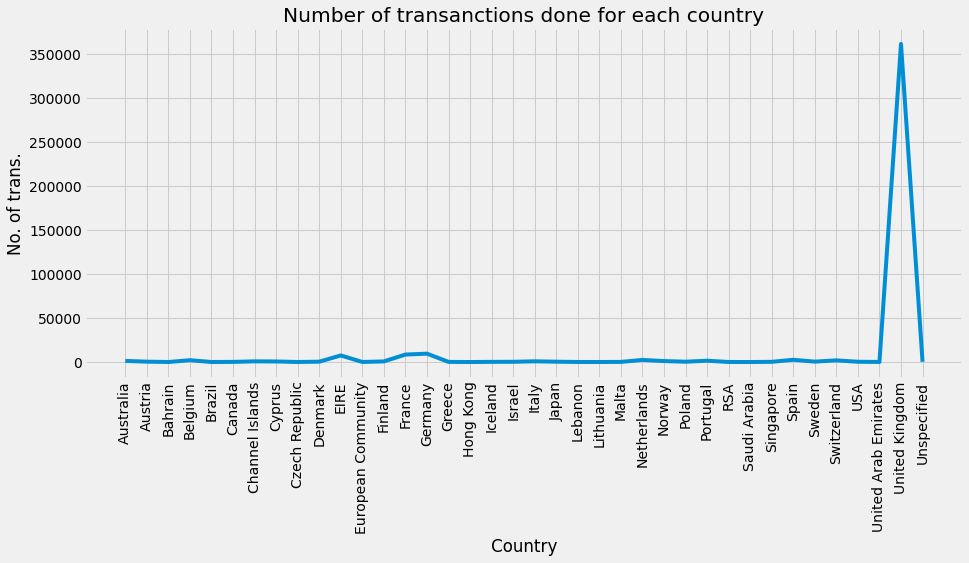

In [167]:
plt.figure(figsize=(14,6))
plt.plot(data.groupby(['Country']).groups.keys(), data.groupby(['Country'])['CustomerID'].count())
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Number of transanctions done for each country")
plt.ylabel("No. of trans.")
plt.xlabel("Country")
plt.show()

<AxesSubplot:>

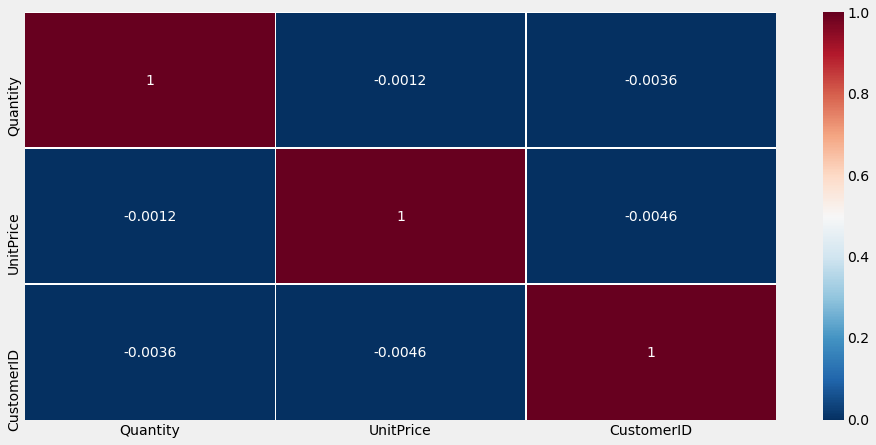

In [168]:
plt.figure(figsize=(15,7))
#new_data = df.loc[:,'PM2.5':'AQI_Bucket']
new_corr = data.corr()
sns.heatmap(new_corr, cmap='RdBu_r', annot=True,linewidth=0.5)

## **RFM Modelling**

In [169]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
RFMScores = cust_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Total Amount': lambda x: x.sum()})

#Convert Invoice Date into type int
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Total Amount': 'Monetary'}, inplace=True)

RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [170]:
#Descriptive Statistics (Recency)
RFMScores.Recency.describe()

count    3921.000000
mean       91.722265
std        99.528532
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

c:\users\swati basu\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


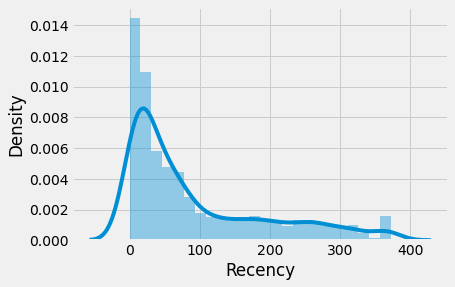

In [171]:
#Recency distribution plot
import seaborn as sns
x = RFMScores['Recency']

ax = sns.distplot(x)

In [172]:
#Descriptive Statistics (Frequency)
RFMScores.Frequency.describe()

count    3921.000000
mean       90.371079
std       217.796155
min         1.000000
25%        17.000000
50%        41.000000
75%        99.000000
max      7847.000000
Name: Frequency, dtype: float64

c:\users\swati basu\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


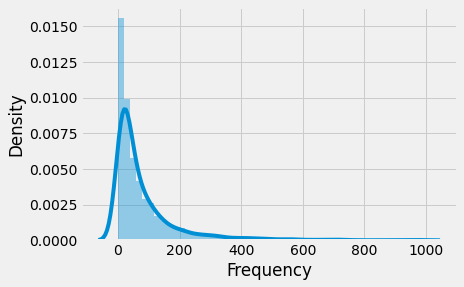

In [173]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = RFMScores.query('Frequency < 1000')['Frequency']

ax = sns.distplot(x)

In [174]:
#Descriptive Statistics (Monetary)
RFMScores.Monetary.describe()

count      3921.000000
mean       1863.910113
std        7481.922217
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.890000
max      259657.300000
Name: Monetary, dtype: float64

c:\users\swati basu\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


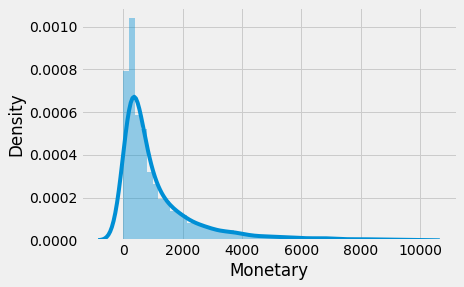

In [175]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = RFMScores.query('Monetary < 10000')['Monetary']

ax = sns.distplot(x)

In [176]:
#Split into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [177]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 300.03999999999996, 0.5: 651.8199999999999, 0.75: 1575.89}}

In [178]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1


In [181]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12747.0,2,103,4196.01,1,1,1,111,3
12748.0,0,4596,33719.73,1,1,1,111,3
12749.0,3,199,4090.88,1,1,1,111,3
12820.0,3,59,942.34,1,2,2,122,5


In [182]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12747.0,2,103,4196.01,1,1,1,111,3
12748.0,0,4596,33719.73,1,1,1,111,3
12749.0,3,199,4090.88,1,1,1,111,3
12820.0,3,59,942.34,1,2,2,122,5


In [185]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12747.0,2,103,4196.01,1,1,1,111,3,Platinum
2,12748.0,0,4596,33719.73,1,1,1,111,3,Platinum
3,12749.0,3,199,4090.88,1,1,1,111,3,Platinum
4,12820.0,3,59,942.34,1,2,2,122,5,Platinum


In [194]:
pl = RFMScores['RFM_Loyalty_Level'] == 'Bronze'
RFMScores[pl]['RFMScore'].value_counts()

11    362
12    343
Name: RFMScore, dtype: int64

In [187]:
#Validate the data for RFMGroup = 111
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,18102.0,0,431,259657.30,1,1,1,111,3,Platinum
1,17450.0,8,337,194550.79,1,1,1,111,3,Platinum
2,17511.0,2,963,91062.38,1,1,1,111,3,Platinum
3,16684.0,4,277,66653.56,1,1,1,111,3,Platinum
4,14096.0,4,5111,65164.79,1,1,1,111,3,Platinum
5,13694.0,3,568,65039.62,1,1,1,111,3,Platinum
6,15311.0,0,2379,60767.90,1,1,1,111,3,Platinum
7,13089.0,2,1818,58825.83,1,1,1,111,3,Platinum
8,15769.0,7,130,56252.72,1,1,1,111,3,Platinum
9,15061.0,3,403,54534.14,1,1,1,111,3,Platinum


In [49]:
import chart_studio as cs 
import plotly.offline as po
import plotly.graph_objs as gobj

#Recency Vs Frequency
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Frequency Vs Monetary
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Recency Vs Monetary
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [50]:
#observations:



# K-means Clustering 

In [51]:
# Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0 :
        return 1
    else:
        return num

# Apply handle_neg_n_zero function to Recency and Monetary columns
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]


# Perform log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFMScores[['Recency','Frequency','Monetary']].apply(np.log, axis = 1).round(3)
Log_Tfd_Data

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.784,0.000,11.254
12747.0,0.693,4.635,8.342
12748.0,0.000,8.433,10.426
12749.0,1.099,5.293,8.317
12820.0,1.099,4.078,6.848
...,...,...,...
18280.0,5.624,2.303,5.196
18281.0,5.193,1.946,4.392
18282.0,1.946,2.485,5.182


c:\users\swati basu\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



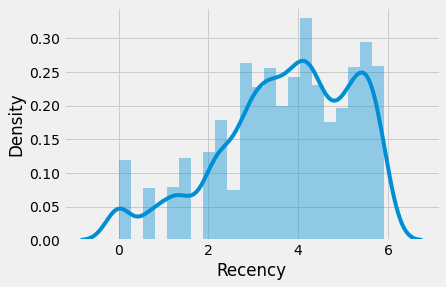

In [52]:
# Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
ax = sns.distplot(Recency_Plot)

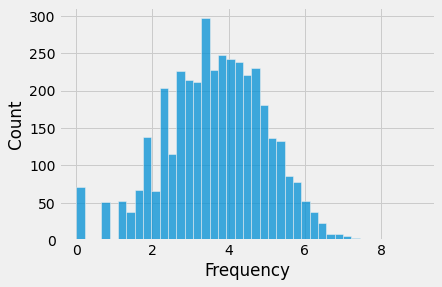

In [53]:
# Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data['Frequency']
ax = sns.histplot(Frequency_Plot)

c:\users\swati basu\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



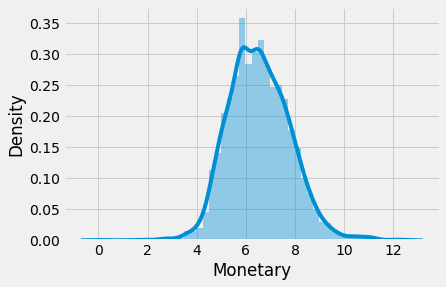

In [54]:
# Data distribution aftre data normalization for Monetary 
Monetary_Plot = Log_Tfd_Data['Monetary']
ax = sns.distplot(Monetary_Plot)

# data is now normally distributed

In [55]:
from sklearn.preprocessing import StandardScaler

# Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

# Tranform back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)
Scaled_Data

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,1.389971,-2.733639,3.766415
12747.0,-2.061189,0.726978,1.439009
12748.0,-2.530970,3.562667,3.104639
12749.0,-1.785964,1.218258,1.419028
12820.0,-1.785964,0.311106,0.244935
...,...,...,...
18280.0,1.281508,-1.014157,-1.075421
18281.0,0.989336,-1.280702,-1.718015
18282.0,-1.211788,-0.878270,-1.086610


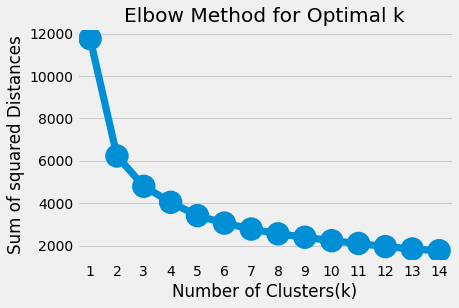

In [56]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
# Plot the graph fro the sum of square values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [94]:
# Perform K-Means Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 1000)
KMean_clust.fit(Scaled_Data)

# Find the culsters for the observation given in the dataset
RFMScores['Cluster'] = KMean_clust.labels_
RFMScores.head(50)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,0,red
12747.0,2,103,4196.01,1,1,1,111,3,Platinum,2,blue
12748.0,1,4596,33719.73,1,1,1,111,3,Platinum,2,blue
12749.0,3,199,4090.88,1,1,1,111,3,Platinum,2,blue
12820.0,3,59,942.34,1,2,2,122,5,Platinum,2,blue
12821.0,214,6,92.72,4,4,4,444,12,Bronze,1,green
12822.0,70,46,948.88,3,2,2,322,7,Gold,0,red
12823.0,74,5,1759.50,3,4,1,341,8,Gold,1,green
12824.0,59,25,397.12,3,3,3,333,9,Silver,0,red


In [109]:
c1 = RFMScores['Cluster'] == 0
km1 = RFMScores[c1]
print(km1['RFMScore'].value_counts())
print(km1['RFM_Loyalty_Level'].value_counts())

7     392
8     359
6     355
5     272
9     203
4      56
10     27
Name: RFMScore, dtype: int64
Gold        1106
Platinum     328
Silver       230
Bronze         0
Name: RFM_Loyalty_Level, dtype: int64


In [197]:
km1.loc[:,['RFMScore','RFM_Loyalty_Level']].value_counts()

RFMScore  RFM_Loyalty_Level
7         Gold                 392
8         Gold                 359
6         Gold                 355
5         Platinum             272
9         Silver               203
4         Platinum              56
10        Silver                27
dtype: int64

In [108]:
c2 = RFMScores['Cluster'] == 1
km2 = RFMScores[c2]
print(km2['RFMScore'].value_counts())
print(km2['RFM_Loyalty_Level'].value_counts())

10    443
11    362
12    343
9     222
8      33
7       3
Name: RFMScore, dtype: int64
Bronze      705
Silver      665
Gold         36
Platinum      0
Name: RFM_Loyalty_Level, dtype: int64


In [198]:
km2.loc[:,['RFMScore','RFM_Loyalty_Level']].value_counts()

RFMScore  RFM_Loyalty_Level
10        Silver               443
11        Bronze               362
12        Bronze               343
9         Silver               222
8         Gold                  33
7         Gold                   3
dtype: int64

In [110]:
c3 = RFMScores['Cluster'] == 2
km3 = RFMScores[c3]
print(km3['RFMScore'].value_counts())
print(km3['RFM_Loyalty_Level'].value_counts())

3    409
4    289
5    114
6     25
7     13
8      1
Name: RFMScore, dtype: int64
Platinum    812
Gold         39
Silver        0
Bronze        0
Name: RFM_Loyalty_Level, dtype: int64


<Figure size 504x504 with 0 Axes>

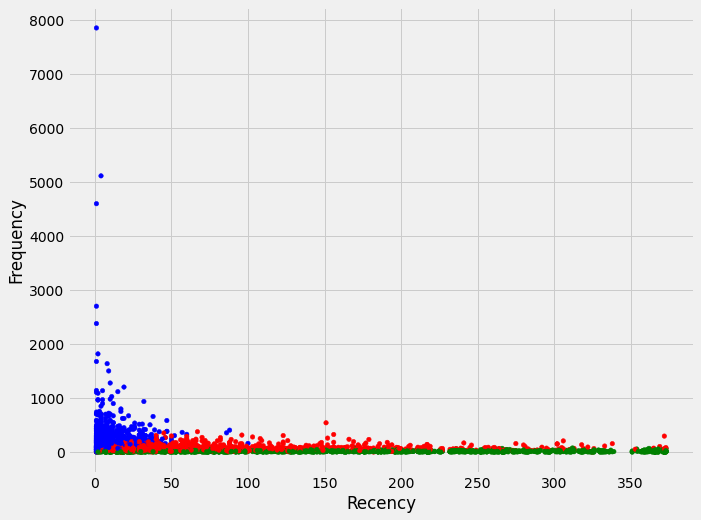

In [111]:
plt.figure(figsize = (7,7))

# Scatter Plot Frequency Vs Recency
Colors = ['red','green','blue']
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
ax = RFMScores.plot(
     kind = 'scatter',
     x = 'Recency', y='Frequency',
     figsize = (10,8),
     c = RFMScores['Color'])

# K-Means Clustering Performance Metrics

In [59]:
from sklearn import metrics
labels_kmeans = KMean_clust.labels_

In [60]:
# K-Means Clustering
metrics.silhouette_score(Scaled_Data, labels_kmeans, metric='euclidean')

0.3060267308655558

In [61]:
# K-Means Clustering
metrics.calinski_harabasz_score(Scaled_Data, labels_kmeans)

2845.0020526175185

In [62]:
# K-Means Clustering
metrics.davies_bouldin_score(Scaled_Data, labels_kmeans)

1.0883462337662657

# Principal Component Anaysis (PCA) applied on K-Means Clustering

In [63]:
from sklearn.decomposition import PCA

In [64]:
pca = PCA(n_components = 2)

principal_comp = pca.fit_transform(Scaled_Data)
principal_comp

array([[-0.07581055, -1.50962983],
       [ 2.3701192 ,  0.99620162],
       [ 5.34545683, -0.23585522],
       ...,
       [-0.57586692,  1.74940527],
       [ 2.79455311,  0.40454075],
       [ 0.73857327, -0.43893696]])

In [65]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1','pca2'], index=Scaled_Data.index)
pca_test = pca_df.copy()
pca_df

,pca1,pca2
CustomerID,,
12346.0,-0.075811,-1.509630
12747.0,2.370119,0.996202
12748.0,5.345457,-0.235855
12749.0,2.515597,0.584828
12820.0,1.250071,1.333978
...,...,...
18280.0,-1.924864,-0.347686
18281.0,-2.328712,0.228412
18282.0,-0.575867,1.749405


In [66]:
pca_df['Cluster'] = KMean_clust.labels_
pca_df

,pca1,pca2,Cluster
CustomerID,,,
12346.0,-0.075811,-1.509630,0
12747.0,2.370119,0.996202,2
12748.0,5.345457,-0.235855,2
12749.0,2.515597,0.584828,2
12820.0,1.250071,1.333978,2
...,...,...,...
18280.0,-1.924864,-0.347686,1
18281.0,-2.328712,0.228412,1
18282.0,-0.575867,1.749405,1


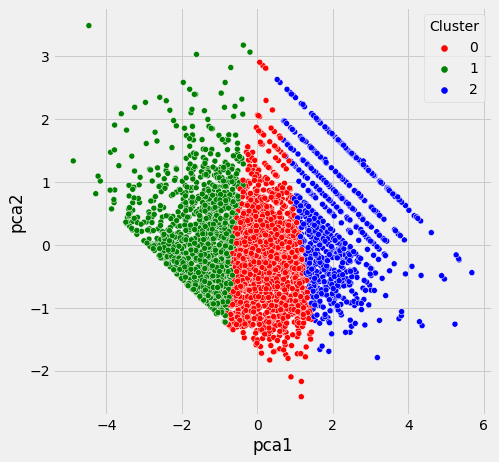

In [67]:
plt.figure(figsize = (7,7))
ax = sns.scatterplot(x='pca1', y='pca2', hue='Cluster', data=pca_df, palette=['red','green','blue'])

# Word Cloud of Clusters in K-Means

In [68]:
from wordcloud import WordCloud

In [69]:
data_words = data
custid = (RFMScores.index).tolist()

temp = pd.DataFrame(columns=['Cluster'], index=[id for id in RFMScores.index])
temp['Cluster'] = RFMScores['Cluster']

#print(t['Cluster'])

for x in custid:
    filt = (data_words['CustomerID'] == x)
    filt1 = (temp.index == x)
    #x = (temp.index == 12346.0)
    t = temp.loc[filt1,'Cluster']
    t = pd.DataFrame(t)
    
    cl = t['Cluster']
    
    data_words.loc[filt,'Cluster'] = int(cl)
    
    

In [70]:
data_words

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0.0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,NaN
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,NaN
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,NaN
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,NaN


Cluster: 0
Titles


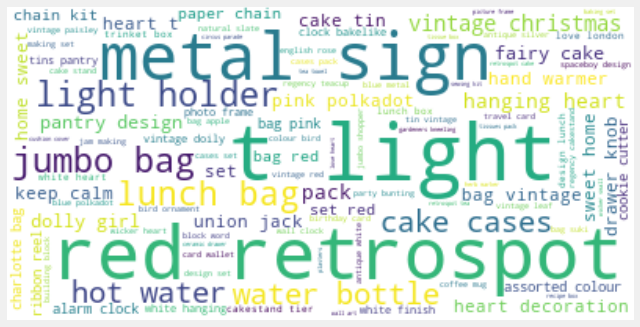

Cluster: 1
Titles


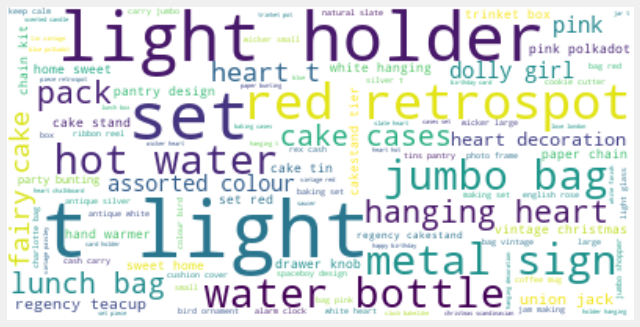

Cluster: 2
Titles


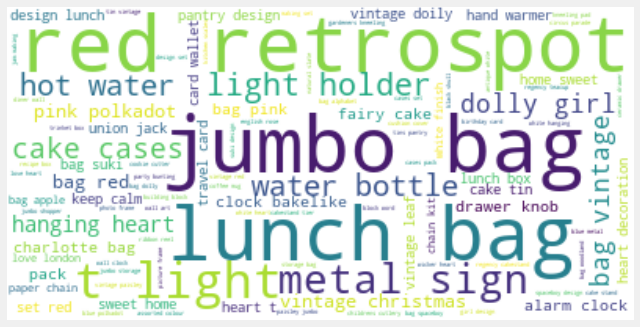

In [71]:
for k in range(0,3):
   s=data_words[data_words.Cluster==k]
   text=s['Description'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   print('Titles')
#    titles=data_words[data_words.Cluster==k]['Description']         
#    print(titles.to_string(index=False))
   plt.figure(figsize = (10,10))
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

# DBSCAN Clustering Algorithm

In [72]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [73]:
#By thumb-rule min_pt is chosen a s 2*(dimensions of data)
min_samples = Scaled_Data.shape[1] * 2

In [74]:
# dbscan = DBSCAN(eps = 0.5, min_samples = min_samples)
# clusters = dbscan.fit_predict(Scaled_Data)
# print("Clusters created : " + str(list(set(clusters))))

In [75]:
neighbors = NearestNeighbors(n_neighbors = min_samples)
neighbors_fit = neighbors.fit(Scaled_Data)
distances, indices = neighbors_fit.kneighbors(Scaled_Data)

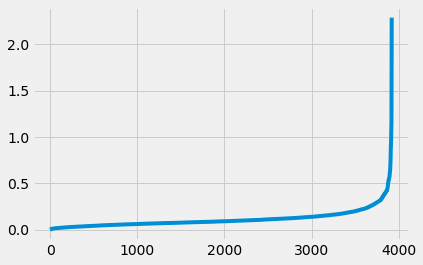

In [76]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [77]:
dbscan = DBSCAN(eps = 0.4, min_samples = min_samples)
clusters = dbscan.fit_predict(Scaled_Data)
print("Clusters created : " + str(list(set(clusters))))

Clusters created : [0, 1, 2, -1]


In [78]:
X = RFMScores.copy() #creating duplicate copy of RFMScores

In [79]:
X['DBSCAN'] = dbscan.labels_
X['DBSCAN'].value_counts()

 0    3618
-1     169
 1      97
 2      37
Name: DBSCAN, dtype: int64

In [80]:
filt = X['DBSCAN'] !=-1
df_dbscan = X[filt]
df_dbscan['DBSCAN'].value_counts()

0    3618
1      97
2      37
Name: DBSCAN, dtype: int64

In [112]:
s1 = X['DBSCAN'] == 0
db1 = X[s1]
print(db1['RFMScore'].value_counts())
print(db1['RFM_Loyalty_Level'].value_counts())

10    454
9     393
7     382
8     381
6     365
5     363
11    341
4     319
3     313
12    307
Name: RFMScore, dtype: int64
Gold        1128
Platinum     995
Silver       847
Bronze       648
Name: RFM_Loyalty_Level, dtype: int64


In [200]:
db1.loc[:,['RFMScore','RFM_Loyalty_Level']].value_counts()

RFMScore  RFM_Loyalty_Level
10        Silver               454
9         Silver               393
7         Gold                 382
8         Gold                 381
6         Gold                 365
5         Platinum             363
11        Bronze               341
4         Platinum             319
3         Platinum             313
12        Bronze               307
dtype: int64

In [113]:
s2 = X['DBSCAN'] == 1
db2 = X[s2]
print(db2['RFMScore'].value_counts())
print(db2['RFM_Loyalty_Level'].value_counts())

3    56
4    16
5    15
7     7
6     2
8     1
Name: RFMScore, dtype: int64
Platinum    87
Gold        10
Silver       0
Bronze       0
Name: RFM_Loyalty_Level, dtype: int64


In [114]:
s3 = X['DBSCAN'] == 2
db3 = X[s3]
print(db3['RFMScore'].value_counts())
print(db3['RFM_Loyalty_Level'].value_counts())

12    26
11    10
10     1
Name: RFMScore, dtype: int64
Bronze      36
Silver       1
Platinum     0
Gold         0
Name: RFM_Loyalty_Level, dtype: int64


In [81]:
scale = Scaled_Data.copy()
scale['DBSCAN'] = dbscan.labels_

filt = scale['DBSCAN'] !=-1
scale = scale[filt]
scale['DBSCAN'].value_counts()

0    3618
1      97
2      37
Name: DBSCAN, dtype: int64

In [83]:
import matplotlib.colors

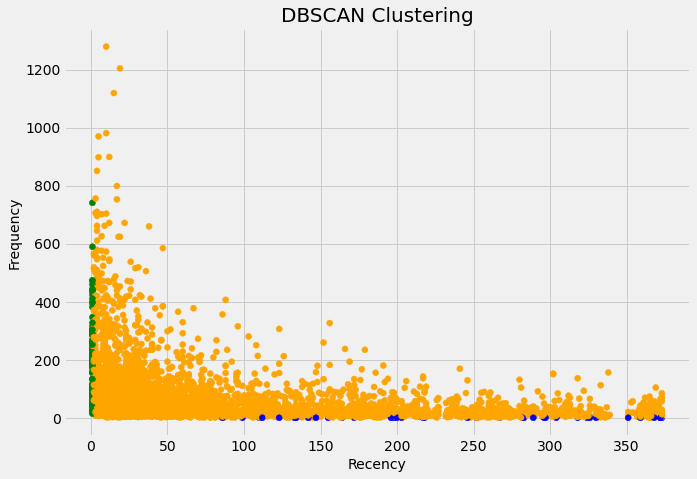

In [84]:
# Plotting the resulting clusters
colors=['orange','green','blue']
plt.figure(figsize=(10,7))
plt.scatter(df_dbscan['Recency'],df_dbscan['Frequency'],c=df_dbscan['DBSCAN'],cmap=matplotlib.colors.ListedColormap(colors))
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Recency',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.show()

In [127]:
data_words = data
custid = (X.index).tolist()

temp = pd.DataFrame(columns=['DBSCAN'], index=[id for id in X.index])
temp['DBSCAN'] = X['DBSCAN']
temp
#print(t['Cluster'])

for x in custid:
    filt = (data_words['CustomerID'] == x)
    filt1 = (temp.index == x)
    #x = (temp.index == 12346.0)
    t = temp.loc[filt1,'DBSCAN']
    t = pd.DataFrame(t)
    
    cl = t['DBSCAN']
    
    data_words.loc[filt,'DBSCAN'] = int(cl)

,DBSCAN
12346.0,-1
12747.0,0
12748.0,-1
12749.0,0
12820.0,0
...,...
18280.0,0
18281.0,0
18282.0,0
18283.0,0


In [126]:
data_words

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster,DBSCAN
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0.0,-1.0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.0,-1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0.0,-1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.0,-1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,NaN,NaN
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,NaN,NaN
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,NaN,NaN
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,NaN,NaN


# PCA applied on DBSCAN Clustering

In [84]:
pca_test['Cluster'] = dbscan.labels_

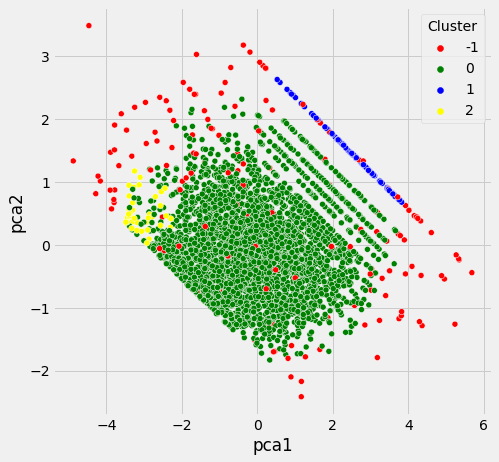

In [85]:
plt.figure(figsize = (7,7))
ax = sns.scatterplot(x='pca1', y='pca2', hue='Cluster', data=pca_test, palette=['red','green','blue','yellow'])

# DBSCAN Clustering Performance Metrics

In [115]:
temp = dbscan.labels_
labels_dbscan = [x for x in temp if x!=-1]

In [116]:
# DBSCAN Clustering
metrics.calinski_harabasz_score(scale[['Recency','Frequency']], labels_dbscan)

343.7065969756609

In [117]:
# DBSCAN Clustering
metrics.silhouette_score(scale[['Recency','Frequency']], labels_dbscan, metric='euclidean')

0.26887346911423843

In [118]:
# DBSCAN Clustering
metrics.davies_bouldin_score(scale[['Recency','Frequency']], labels_dbscan)

0.5561542388409754

# Hierarchical Agglomerative Clusetring 

In [119]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [91]:
# dendrogram = sch.dendrogram(sch.linkage(Log_Tfd_Data, method = 'ward'))

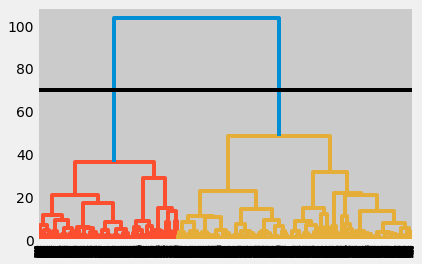

In [92]:
dendrogram = sch.dendrogram(sch.linkage(Scaled_Data, method = 'ward'))
plt.axhline(y = 70, color = 'black', linestyle = '-')

In [93]:
# dendrogram = sch.dendrogram(sch.linkage(Scaled_Data, method = 'single'))
# plt.axhline(y = 70, color = 'black', linestyle = '-')

In [94]:
# dendrogram = sch.dendrogram(sch.linkage(Scaled_Data, method = 'average'))
# plt.axhline(y = 70, color = 'black', linestyle = '-')

In [95]:
# dendrogram = sch.dendrogram(sch.linkage(Scaled_Data, method = 'complete'))
# plt.axhline(y = 70, color = 'black', linestyle = '-')

In [120]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(Scaled_Data)
labels = model.labels_

In [121]:
X['HC'] = model.labels_

In [123]:
h1 = X['HC'] == 0
hc1 = X[h1]
print(hc1['RFMScore'].value_counts())
print(hc1['RFM_Loyalty_Level'].value_counts())

10    470
9     422
8     391
11    362
7     347
12    343
6      95
5      26
Name: RFMScore, dtype: int64
Silver      892
Gold        833
Bronze      705
Platinum     26
Name: RFM_Loyalty_Level, dtype: int64


In [124]:
h2 = X['HC'] == 1
hc2 = X[h2]
print(hc2['RFMScore'].value_counts())
print(hc2['RFM_Loyalty_Level'].value_counts())

3    409
5    360
4    345
6    285
7     61
9      3
8      2
Name: RFMScore, dtype: int64
Platinum    1114
Gold         348
Silver         3
Bronze         0
Name: RFM_Loyalty_Level, dtype: int64


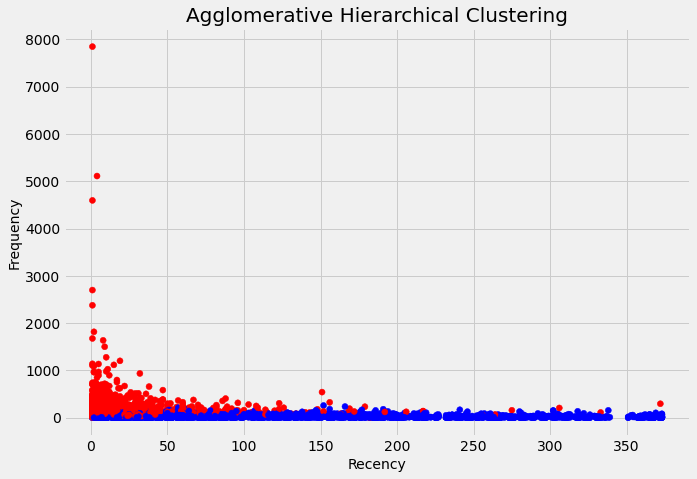

In [122]:
#Plotting the resulting clusters
colors=['blue','red']
plt.figure(figsize=(10,7))
plt.scatter(X['Recency'],X['Frequency'],c=X['HC'],cmap=matplotlib.colors.ListedColormap(colors))
plt.title('Agglomerative Hierarchical Clustering',fontsize=20)
plt.xlabel('Recency',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.show()

# PCA applied on Hierarchical Agglomerative Clusetring

In [99]:
pca_test['Cluster'] = model.labels_
labels_hierarchial = model.labels_

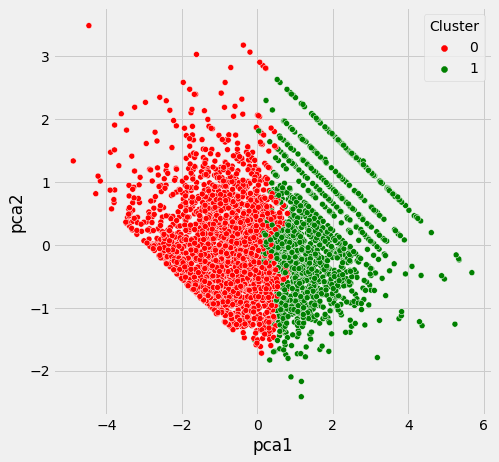

In [100]:
plt.figure(figsize = (7,7))
ax = sns.scatterplot(x='pca1', y='pca2', hue='Cluster', data=pca_test, palette=['red','green'])

# Hierarchical Agglomerative Clusetring Performance Metrics

In [101]:
# Hierarchical Clustering
metrics.silhouette_score(Scaled_Data, labels_hierarchial, metric='euclidean')

0.3889697584719608

In [102]:
# Hierarchical Clustering
metrics.calinski_harabasz_score(Scaled_Data, labels_hierarchial)

3290.3554334550786

In [103]:
# Hierarchical Clustering
metrics.davies_bouldin_score(Scaled_Data, labels_hierarchial)

0.952032452789026

# Gaussian Mixure Model

In [125]:
from sklearn.mixture import GaussianMixture

In [105]:
from sklearn import mixture
import itertools

lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(Scaled_Data)
        bic.append(gmm.bic(Scaled_Data))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
clf

GaussianMixture(n_components=6)

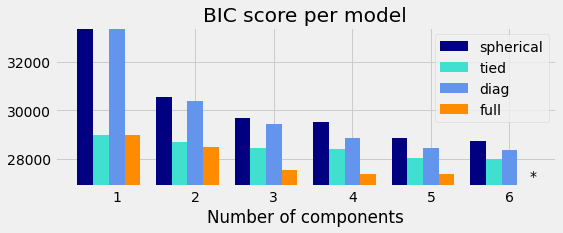

In [106]:
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

In [126]:
EM = GaussianMixture(n_components = 4)
EM.fit(Scaled_Data)

GaussianMixture(n_components=4)

In [127]:
cluster = EM.predict(Scaled_Data)

In [128]:
X['G'] = cluster

In [129]:
g1 = X['G'] == 0
gm1 = X[g1]
print(gm1['RFMScore'].value_counts())
print(gm1['RFM_Loyalty_Level'].value_counts())

12    92
11    57
10    56
9     34
8     27
7     14
6      5
Name: RFMScore, dtype: int64
Bronze      149
Silver       90
Gold         46
Platinum      0
Name: RFM_Loyalty_Level, dtype: int64


In [130]:
g2 = X['G'] == 1
gm2 = X[g2]
print(gm2['RFMScore'].value_counts())
print(gm2['RFM_Loyalty_Level'].value_counts())

3     203
5      84
4      77
6      62
7      61
9      59
8      42
10     19
11      3
Name: RFMScore, dtype: int64
Platinum    364
Gold        165
Silver       78
Bronze        3
Name: RFM_Loyalty_Level, dtype: int64


In [131]:
g3 = X['G'] == 2
gm3 = X[g3]
print(gm3['RFMScore'].value_counts())
print(gm3['RFM_Loyalty_Level'].value_counts())

5    300
6    275
4    268
3    206
7    140
8     33
9      1
Name: RFMScore, dtype: int64
Platinum    774
Gold        448
Silver        1
Bronze        0
Name: RFM_Loyalty_Level, dtype: int64


In [132]:
g4 = X['G'] == 3
gm4 = X[g4]
print(gm4['RFMScore'].value_counts())
print(gm4['RFM_Loyalty_Level'].value_counts())

10    395
9     331
11    302
8     291
12    251
7     193
6      38
5       2
Name: RFMScore, dtype: int64
Silver      726
Bronze      553
Gold        522
Platinum      2
Name: RFM_Loyalty_Level, dtype: int64


In [133]:
from plotnine import *

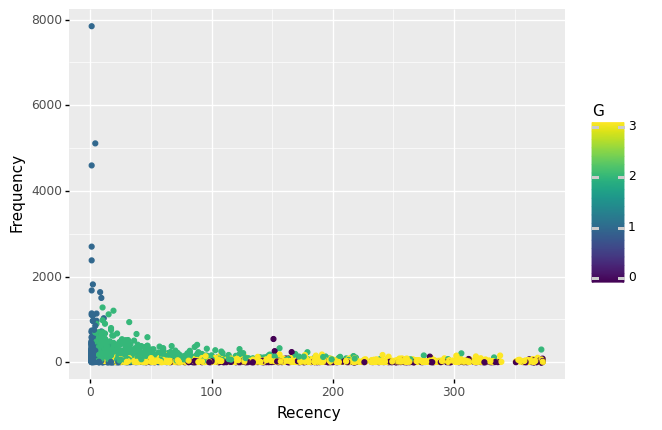

<ggplot: (185580836825)>

In [134]:
(ggplot (X, aes(x = 'Recency', y = 'Frequency', color = 'G')) + geom_point())

# PCA applied on Gaussian Mixure Model

In [112]:
pca_test['Cluster'] = cluster
pca_test['Cluster'].value_counts()

0    1403
3    1186
2     849
1     483
Name: Cluster, dtype: int64

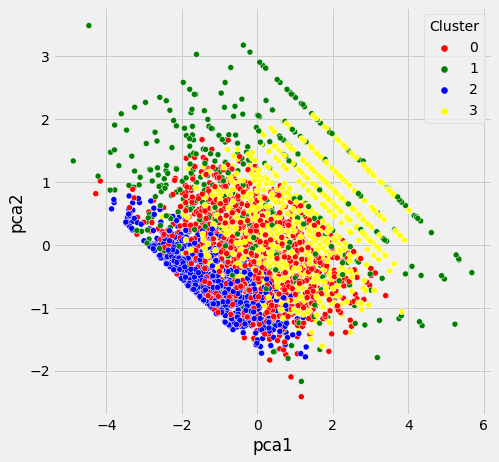

In [113]:
plt.figure(figsize = (7,7))
ax = sns.scatterplot(x='pca1', y='pca2', hue='Cluster', data=pca_test, palette=['red','green','blue','yellow'])

# Gaussian Mixure Model Performance Metrics

In [114]:
# Gaussian Mixure Model
metrics.silhouette_score(Scaled_Data, cluster, metric='euclidean')

0.031081880813987845

In [115]:
# Gaussian Mixure Model
metrics.calinski_harabasz_score(Scaled_Data, cluster)

492.68826361703236

In [116]:
# Gaussian Mixure Model
metrics.davies_bouldin_score(Scaled_Data, cluster)

2.592164523713154